In [30]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm,tree, ensemble,model_selection

In [2]:
train_pc1=pd.read_csv("data/test_data1536128609.98_screen1.csv",header=None)
print(train_pc1.shape)
train_pc1.head()

(203, 3)


,0,1,2
0,1.536129e+09,36.62,25.9
1,1.536129e+09,36.62,25.9
2,1.536129e+09,36.62,25.9
3,1.536129e+09,36.62,25.9
4,1.536129e+09,36.62,25.9


In [64]:
train_pc2=pd.read_csv("data/test_data1536128871.84_screen2.csv",header=None)
print(train_pc2.shape)
train_pc1.head()

(291, 3)


,Timestamp,MaxCurrent,EffCurrent,Time Period,Standalone_Time,PC Screen1
0,1.536129e+09,36.62,25.9,0,0,1
1,1.536129e+09,36.62,25.9,1.06,1.06,2
2,1.536129e+09,36.62,25.9,1.07,1.07,2
3,1.536129e+09,36.62,25.9,1.06,1.06,2
4,1.536129e+09,36.62,25.9,1.07,1.07,2


In [4]:
train_sensor=pd.read_csv("data/test_data1536129261.77_device253.csv",header=None)
print(train_sensor.shape)
train_sensor.head()

(269, 3)


,0,1,2
0,1.536129e+09,0.0,0.0
1,1.536129e+09,0.0,0.0
2,1.536129e+09,0.0,0.0
3,1.536129e+09,0.0,0.0
4,1.536129e+09,0.0,0.0


In [5]:
test=pd.read_csv("data/test_data1536129670.55_main.csv",header=None)
print(test.shape)
test.head()

(2973, 3)


,0,1,2
0,1.536130e+09,24.41,17.3
1,1.536130e+09,12.21,8.6
2,1.536130e+09,36.62,25.9
3,1.536130e+09,24.41,17.3
4,1.536130e+09,36.62,25.9


# Rename Columns
##### The columns are assigned values - Timestamp, MaxCurrent, EffCurrent. These are in-line with the specifications available in the question. 

In [65]:
train_pc1.rename(columns={0:"Timestamp",1:"MaxCurrent",2:"EffCurrent"},inplace=True)
train_pc2.rename(columns={0:"Timestamp",1:"MaxCurrent",2:"EffCurrent"},inplace=True)
train_sensor.rename(columns={0:"Timestamp",1:"MaxCurrent",2:"EffCurrent"},inplace=True)
test.rename(columns={0:"Timestamp",1:"MaxCurrent",2:"EffCurrent"},inplace=True)

# Analysing the states of the Devices

There are two types of devices. The states of the devices can be observed by the line plots below:
1. PC 1 & 2 have 3 states: 
   >a. ON- when there is a sudden spike (represented by state 1)<br> 
   >b. IDLE- when there is a stable mode (represented by state 2) <br>
   >c. OFF- when there is no current flow, i.e. Effective current=0 (represented by state 0) 
2. Temperature Sensor- has 2 states-
   >a. ON- when there is a current flow (represented by state 1) <br>
   >b. OFF- when there is no current flow, i.e. Effective Current or RMS=0 (represented by state 0)


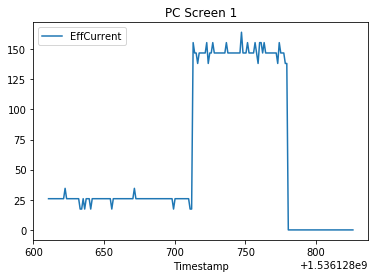

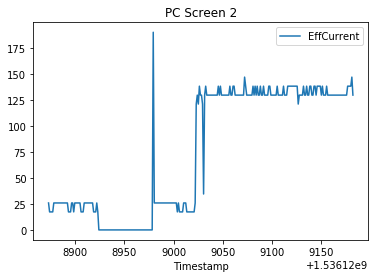

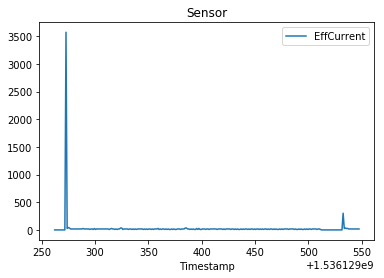

In [7]:
linesPC1 = train_pc1.plot.line(x='Timestamp', y='EffCurrent',title='PC Screen 1')
linesPC2 = train_pc2.plot.line(x='Timestamp', y='EffCurrent',title='PC Screen 2')
linesSensor = train_sensor.plot.line(x='Timestamp', y='EffCurrent',title='Sensor')

In [8]:
train_pc1['Time Period']=''
train_pc1['Standalone_Time']=''
for index,row in train_pc1.iterrows():
    if(index==0):
        train_pc1['Standalone_Time'][0]=0
        train_pc1['Time Period'][0]=0
    elif(train_pc1['EffCurrent'][index-1]==train_pc1['EffCurrent'][index]):
        train_pc1['Standalone_Time'][index]=round(train_pc1['Timestamp'][index]-train_pc1['Timestamp'][index-1],2)
        train_pc1['Time Period'][index]=round(train_pc1['Timestamp'][index]-train_pc1['Timestamp'][index-1],2)
    else:
        train_pc1['Standalone_Time'][index]=0
        train_pc1['Time Period'][index]=round(train_pc1['Timestamp'][index]-train_pc1['Timestamp'][index-1],2)

train_pc1['PC Screen1']=''
train_pc1['EffCurrent_Diff'] = train_pc1['EffCurrent'].diff()
train_pc1.loc[(train_pc1['EffCurrent_Diff']== 0), 'PC Screen1'] = 2
train_pc1.loc[(train_pc1['EffCurrent_Diff']!= 0), 'PC Screen1'] = 1
train_pc1.loc[(train_pc1['EffCurrent'] == 0), 'PC Screen1'] = 0
train_pc1.drop('EffCurrent_Diff',axis=1,inplace=True)
train_pc1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,Timestamp,MaxCurrent,EffCurrent,Time Period,Standalone_Time,PC Screen1
0,1.536129e+09,36.62,25.9,0,0,1
1,1.536129e+09,36.62,25.9,1.06,1.06,2
2,1.536129e+09,36.62,25.9,1.07,1.07,2
3,1.536129e+09,36.62,25.9,1.06,1.06,2
4,1.536129e+09,36.62,25.9,1.07,1.07,2


In [66]:
train_pc2['Time Period']=''
train_pc2['Standalone_Time']=''
for index,row in train_pc2.iterrows():
    if(index==0):
        train_pc2['Standalone_Time'][0]=0
        train_pc2['Time Period'][0]=0
    elif(train_pc2['EffCurrent'][index-1]==train_pc2['EffCurrent'][index]):
        train_pc2['Standalone_Time'][index]=round(train_pc2['Timestamp'][index]-train_pc2['Timestamp'][index-1],2)
        train_pc2['Time Period'][index]=round(train_pc2['Timestamp'][index]-train_pc2['Timestamp'][index-1],2)
    else:
        train_pc2['Standalone_Time'][index]=0
        train_pc2['Time Period'][index]=round(train_pc2['Timestamp'][index]-train_pc2['Timestamp'][index-1],2)

        
train_pc2['PC Screen2']=''
train_pc2['EffCurrent_Diff'] = train_pc2['EffCurrent'].diff()
train_pc2.loc[(train_pc2['EffCurrent_Diff']== 0), 'PC Screen2'] = 2
train_pc2.loc[(train_pc2['EffCurrent_Diff']!= 0), 'PC Screen2'] = 1
train_pc2.loc[(train_pc2['EffCurrent'] == 0), 'PC Screen2'] = 0
train_pc2.drop('EffCurrent_Diff',axis=1,inplace=True)
train_pc2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWa

,Timestamp,MaxCurrent,EffCurrent,Time Period,Standalone_Time,PC Screen2
0,1.536129e+09,36.62,25.9,0,0,1
1,1.536129e+09,24.41,17.3,1.07,0,1
2,1.536129e+09,24.41,17.3,1.07,1.07,2
3,1.536129e+09,24.41,17.3,1.06,1.06,2
4,1.536129e+09,24.41,17.3,1.07,1.07,2


In [51]:
train_sensor['Time Period']=''
for index,row in train_sensor.iterrows():
    if(index==0):
        train_sensor['Time Period'][0]=0
    else:
        train_sensor['Time Period'][index]=round(train_sensor['Timestamp'][index]-train_sensor['Timestamp'][index-1],2)

train_pc2['PC Screen2']=''
train_sensor['EffCurrent_Diff'] = train_sensor['EffCurrent'].diff()
train_sensor.loc[(train_sensor['EffCurrent_Diff']== 0), 'Temperature Sensor'] = 0
train_sensor.loc[(train_sensor['EffCurrent_Diff']!= 0), 'Temperature Sensor'] = 1
train_sensor.loc[(train_sensor['EffCurrent'] == 0), 'Temperature Sensor'] = 0
train_sensor.drop('EffCurrent_Diff',axis=1,inplace=True)
train_sensor.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Timestamp,MaxCurrent,EffCurrent,Time Period,Temperature Sensor
0,1.536129e+09,0.0,0.0,0,0
1,1.536129e+09,0.0,0.0,1.06,0
2,1.536129e+09,0.0,0.0,1.06,0
3,1.536129e+09,0.0,0.0,1.06,0
4,1.536129e+09,0.0,0.0,1.06,0


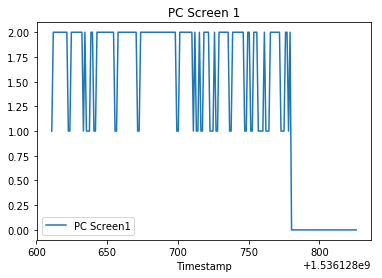

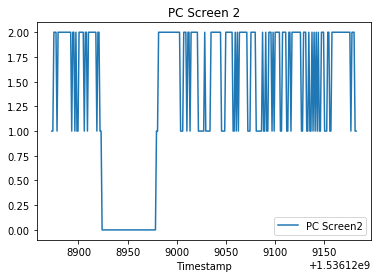

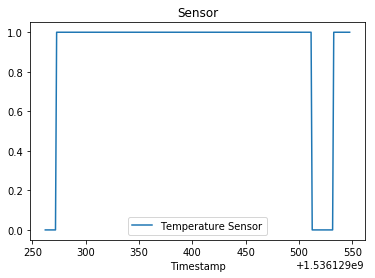

In [11]:
linesPC1 = train_pc1.plot.line(x='Timestamp', y='PC Screen1',title='PC Screen 1')
linesPC2 = train_pc2.plot.line(x='Timestamp', y='PC Screen2',title='PC Screen 2')
linesSensor = train_sensor.plot.line(x='Timestamp', y='Temperature Sensor',title='Sensor')

# Exploratory Analysis
### 1. Checking for any missing values
There are no missing values in the data.

In [12]:
missing_values_pc1=train_pc1.isnull().sum()[train_pc1.isnull().sum() > 0]
print(missing_values_pc1)
missing_values_pc2=train_pc2.isnull().sum()[train_pc2.isnull().sum() > 0]
print(missing_values_pc2)
missing_values_sensor=train_sensor.isnull().sum()[train_sensor.isnull().sum() > 0]
print(missing_values_sensor)

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


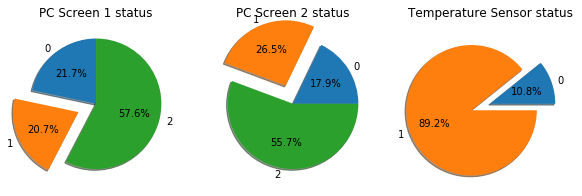

In [13]:
plt.figure(figsize=(10,3))
x=train_pc1.groupby(['PC Screen1'])['Timestamp'].count()*100/len(train_pc1)
x=x.reset_index()

plt.subplot(131,aspect=1)
plt.pie(x=x['Timestamp'],labels=x['PC Screen1'], autopct='%1.1f%%', shadow=True,explode=(0,0.3,0),startangle=90)
plt.title("PC Screen 1 status")

plt.subplot(132,aspect=1)
x=train_pc2.groupby(['PC Screen2'])['Timestamp'].count()*100/len(train_pc2)
x=x.reset_index()
plt.pie(x=x['Timestamp'],labels=x['PC Screen2'], autopct='%1.1f%%', shadow=True,explode=(0,0.3,0))

plt.title("PC Screen 2 status")

plt.subplot(133,aspect=1)
x=train_sensor.groupby(['Temperature Sensor'])['Timestamp'].count()*100/len(train_sensor)
x=x.reset_index()
plt.pie(x=x['Timestamp'],labels=x['Temperature Sensor'], autopct='%1.1f%%', shadow=True,explode=(0,0.3))

plt.title("Temperature Sensor status")

plt.show()

# Splitting into Train and test
The splitted data must have similar distribution of all the classes.

In [67]:
train_data,validate=train_test_split(train_pc1,test_size=0.2)
x_train_pc1 = pd.DataFrame(train_data.iloc[:,1:4])
y_train_pc1=pd.DataFrame(train_data.iloc[:,-1])
x_test_pc1 = pd.DataFrame(validate.iloc[:,1:4])
y_test_pc1=pd.DataFrame(validate.iloc[:,-1])

train_data,validate=train_test_split(train_pc2,test_size=0.2)
x_train_pc2 = pd.DataFrame(train_data.iloc[:,1:4])
y_train_pc2=pd.DataFrame(train_data.iloc[:,-1])
x_test_pc2 = pd.DataFrame(validate.iloc[:,1:4])
y_test_pc2=pd.DataFrame(validate.iloc[:,-1])

train_data,validate=train_test_split(train_sensor,test_size=0.2)
x_train_sensor = pd.DataFrame(train_data.iloc[:,1:4])
y_train_sensor=pd.DataFrame(train_data.iloc[:,-1])
x_test_sensor = pd.DataFrame(validate.iloc[:,1:4])
y_test_sensor=pd.DataFrame(validate.iloc[:,-1])

In [53]:
print(y_train_pc1['PC Screen1'].value_counts()/len(y_train_pc1)*100)
print(y_test_pc1['PC Screen1'].value_counts()/len(y_test_pc1)*100)
print(y_train_pc2['PC Screen2'].value_counts()/len(y_train_pc2)*100)
print(y_test_pc2['PC Screen2'].value_counts()/len(y_test_pc2)*100)
print(y_train_sensor['Temperature Sensor'].value_counts()/len(y_train_sensor)*100)
print(y_test_sensor['Temperature Sensor'].value_counts()/len(y_test_sensor)*100)
x_train_sensor.head()

2    61.111111
0    20.370370
1    18.518519
Name: PC Screen1, dtype: float64
2    43.902439
1    29.268293
0    26.829268
Name: PC Screen1, dtype: float64
    100.0
Name: PC Screen2, dtype: float64
    100.0
Name: PC Screen2, dtype: float64
1    53.953488
0    46.046512
Name: Temperature Sensor, dtype: float64
1    53.703704
0    46.296296
Name: Temperature Sensor, dtype: float64


,MaxCurrent,EffCurrent,Time Period
168,24.41,17.3,1.06
261,24.41,17.3,1.07
264,24.41,17.3,1.06
173,24.41,17.3,1.07
198,24.41,17.3,1.06


# Model Application
Various different models would be applied on the final dataset

## Model Selection for PC Display 1

In [31]:
models={'logit':'','svm':'','bagging':'','rforest':'','adaboost':'','gboost':''}
regularization=[0.001,0.01,0.1,1,10,100,1000]

##Logistic Regression
print("Logistic Regression")
scores=[]
for c in regularization:
    logit=linear_model.LogisticRegression(C=c)
    logit.fit(x_train_pc1,y_train_pc1)
    scores.append(logit.score(x_test_pc1, y_test_pc1))

c=regularization[np.argmax(scores)]
logit=linear_model.LogisticRegression(C=c)
logit.fit(x_train_pc1,y_train_pc1)
print("With C= ",c," Score is:",logit.score(x_test_pc1, y_test_pc1))

models['logit']=logit.score(x_test_pc1, y_test_pc1)
y_pred=logit.predict(x_test_pc1)
    
labels = [0,1,2]
print("Accuracy= ",round(logit.score(x_test_pc1,y_test_pc1)*100,1),"%")

##Support Vector Machines
print("Support Vector Machines")
scores=[]
for c in regularization:
    svc= svm.LinearSVC(C=c)
    svc.fit(x_train_pc1,y_train_pc1)
    print("Accuracy for C= ",c," is= ", svc.score(x_test_pc1,y_test_pc1))
    scores.append(svc.score(x_test_pc1,y_test_pc1))

c=regularization[np.argmax(scores)]
svc=svm.LinearSVC(C=c)
svc.fit(x_train_pc1,y_train_pc1)
y_pred_svm=svc.predict(x_test_pc1)

print("Accuracy= ",round(svc.score(x_test_pc1,y_test_pc1)*100,1),"%")
    
models['svm']=svc.score(x_test_pc1, y_test_pc1)


#Bagging
print("Bagging")
bagging = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=20,max_features=3), max_samples = 0.5, max_features = 3, oob_score = True, random_state = 2018)
bagging.fit(x_train_pc1, y_train_pc1)
print("Accuracy: ",bagging.score(x_test_pc1,y_test_pc1))
models['bagging']=bagging.score(x_test_pc1, y_test_pc1)

#Boosting with Random Forest
print("Boosting with Randome Forest")
rforest = ensemble.RandomForestClassifier(max_features = 3, oob_score = True, random_state = 2018)
rforest.fit(x_train_pc1, y_train_pc1)

print("Accuracy: ",rforest.score(x_test_pc1,y_test_pc1))
models['rforest']=rforest.score(x_test_pc1, y_test_pc1)

#Adaboosting
print("AdaBoost")
adaboost = [
    ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 20), n_estimators = 50, algorithm ='SAMME', random_state = 2018),
    ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 20), n_estimators = 50, algorithm ='SAMME.R', random_state = 2018)]

for i in range(2):
    adaboost[i].fit(x_train_pc1, y_train_pc1)

scores=[]
for i in range(2):
    scores.append(adaboost[i].score(x_test_pc1, y_test_pc1))
    print(adaboost[i].score(x_test_pc1, y_test_pc1))

models['adaboost']=np.max(scores)

#Gradient Boosting    
print("Gradient Boosting")
gboost = ensemble.GradientBoostingClassifier(n_estimators = 50, random_state = 2018)
gboost.fit(x_train_pc1, y_train_pc1)
y_pred_gboost=gboost.predict(x_test_pc1)
print("Accuracy for Gradient Boosting: ", metrics.accuracy_score(y_test_pc1,y_pred_gboost))

models['gboost']=metrics.accuracy_score(y_test_pc1,y_pred_gboost)

##Running the model on the test Data

model=max(models,key=models.get)
print("Best Model is : ",model)

Logistic Regression
With C=  1000  Score is: 0.8292682926829268
Accuracy=  82.9 %
Support Vector Machines
Accuracy for C=  0.001  is=  0.7073170731707317
Accuracy for C=  0.01  is=  0.6585365853658537


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Accuracy for C=  0.1  is=  0.6585365853658537
Accuracy for C=  1  is=  0.7073170731707317
Accuracy for C=  10  is=  0.5121951219512195


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for C=  100  is=  0.7073170731707317
Accuracy for C=  1000  is=  0.7073170731707317
Accuracy=  70.7 %
Bagging


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.8780487804878049
Boosting
Accuracy:  0.9024390243902439
AdaBoost


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataC

0.9024390243902439
0.9024390243902439
Gradient Boosting


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Gradient Boosting:  0.9024390243902439
Best Model is :  rforest


## Model Selection for PC Display 2 

In [37]:
models={'logit':'','svm':'','bagging':'','rforest':'','adaboost':'','gboost':''}
regularization=[0.001,0.01,0.1,1,10,100,1000]

##Logistic Regression
print("Logistic Regression")
scores=[]
for c in regularization:
    logit=linear_model.LogisticRegression(C=c)
    logit.fit(x_train_pc2,y_train_pc2)
    scores.append(logit.score(x_test_pc2, y_test_pc2))

c=regularization[np.argmax(scores)]
logit=linear_model.LogisticRegression(C=c)
logit.fit(x_train_pc2,y_train_pc2)
print("With C= ",c," Score is:",logit.score(x_test_pc2, y_test_pc2))

models['logit']=logit.score(x_test_pc2, y_test_pc2)
y_pred=logit.predict(x_test_pc2)
    
labels = [0,1,2]
print("Accuracy= ",round(logit.score(x_test_pc2,y_test_pc2)*100,1),"%")

##Support Vector Machines
print("Support Vector Machines")
scores=[]
for c in regularization:
    svc= svm.LinearSVC(C=c)
    svc.fit(x_train_pc2,y_train_pc2)
    print("Accuracy for C= ",c," is= ", svc.score(x_test_pc2,y_test_pc2))
    scores.append(svc.score(x_test_pc2,y_test_pc2))

c=regularization[np.argmax(scores)]
svc=svm.LinearSVC(C=c)
svc.fit(x_train_pc2,y_train_pc2)
y_pred_svm=svc.predict(x_test_pc2)

print("Accuracy= ",round(svc.score(x_test_pc2,y_test_pc2)*100,1),"%")
    
models['svm']=svc.score(x_test_pc2, y_test_pc2)


#Bagging
print("Bagging")
bagging = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=20,max_features=3), max_samples = 0.5, max_features = 3, oob_score = True, random_state = 2018)
bagging.fit(x_train_pc2, y_train_pc2)
print("Accuracy: ",bagging.score(x_test_pc2,y_test_pc2))
models['bagging']=bagging.score(x_test_pc2, y_test_pc2)

#Boosting with Random Forest
print("Boosting")
rforest = ensemble.RandomForestClassifier(max_features = 3, oob_score = True, random_state = 2018)
rforest.fit(x_train_pc2, y_train_pc2)

print("Accuracy: ",rforest.score(x_test_pc2,y_test_pc2))
models['rforest']=rforest.score(x_test_pc2, y_test_pc2)

#Adaboosting
print("AdaBoost")
adaboost = [
    ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 20), n_estimators = 50, algorithm ='SAMME', random_state = 2018),
    ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 20), n_estimators = 50, algorithm ='SAMME.R', random_state = 2018)]

for i in range(2):
    adaboost[i].fit(x_train_pc2, y_train_pc2)

scores=[]
for i in range(2):
    scores.append(adaboost[i].score(x_test_pc2, y_test_pc2))
    print(adaboost[i].score(x_test_pc2, y_test_pc2))

models['adaboost']=np.max(scores)

#Gradient Boosting    
print("Gradient Boosting")
gboost = ensemble.GradientBoostingClassifier(n_estimators = 50, random_state = 2018)
gboost.fit(x_train_pc2, y_train_pc2)
y_pred_gboost=gboost.predict(x_test_pc2)
print("Accuracy for Gradient Boosting: ", metrics.accuracy_score(y_test_pc2,y_pred_gboost))

models['gboost']=metrics.accuracy_score(y_test_pc2,y_pred_gboost)

##Running the model on the test Data

model=max(models,key=models.get)
print("Best Model is : ",model)

Logistic Regression
With C=  100  Score is: 0.6440677966101694
Accuracy=  64.4 %
Support Vector Machines
Accuracy for C=  0.001  is=  0.6271186440677966


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Accuracy for C=  0.01  is=  0.6271186440677966
Accuracy for C=  0.1  is=  0.6271186440677966
Accuracy for C=  1  is=  0.711864406779661


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for C=  10  is=  0.7288135593220338
Accuracy for C=  100  is=  0.6271186440677966
Accuracy for C=  1000  is=  0.6271186440677966


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy=  72.9 %
Bagging
Accuracy:  0.7288135593220338
Boosting
Accuracy:  0.7288135593220338
AdaBoost


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataC

0.7288135593220338
0.7288135593220338
Gradient Boosting


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Gradient Boosting:  0.6440677966101694
Best Model is :  svm


## Model Selection for Temperature Sensor

In [54]:
models={'logit':'','svm':'','bagging':'','rforest':'','adaboost':'','gboost':''}
regularization=[0.001,0.01,0.1,1,10,100,1000]

##Logistic Regression
print("Logistic Regression")
scores=[]
for c in regularization:
    logit=linear_model.LogisticRegression(C=c)
    logit.fit(x_train_sensor,y_train_sensor)
    scores.append(logit.score(x_test_sensor, y_test_sensor))

c=regularization[np.argmax(scores)]
logit=linear_model.LogisticRegression(C=c)
logit.fit(x_train_sensor,y_train_sensor)
print("With C= ",c," Score is:",logit.score(x_test_sensor, y_test_sensor))

models['logit']=logit.score(x_test_sensor, y_test_sensor)
y_pred=logit.predict(x_test_sensor)
    
labels = [0,1]
print("Accuracy= ",round(logit.score(x_test_sensor,y_test_sensor)*100,1),"%")

##Support Vector Machines
print("Support Vector Machines")
scores=[]
for c in regularization:
    svc= svm.LinearSVC(C=c)
    svc.fit(x_train_sensor,y_train_sensor)
    print("Accuracy for C= ",c," is= ", svc.score(x_test_sensor,y_test_sensor))
    scores.append(svc.score(x_test_sensor,y_test_sensor))

c=regularization[np.argmax(scores)]
svc=svm.LinearSVC(C=c)
svc.fit(x_train_sensor,y_train_sensor)
y_pred_svm=svc.predict(x_test_sensor)

print("Accuracy= ",round(svc.score(x_test_sensor,y_test_sensor)*100,1),"%")
    
models['svm']=svc.score(x_test_sensor, y_test_sensor)


#Bagging
print("Bagging")
bagging = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=20,max_features=3), max_samples = 0.5, max_features = 3, oob_score = True, random_state = 2018)
bagging.fit(x_train_sensor, y_train_sensor)
print("Accuracy: ",bagging.score(x_test_sensor,y_test_sensor))
models['bagging']=bagging.score(x_test_sensor, y_test_sensor)

#Boosting with Random Forest
print("Boosting")
rforest = ensemble.RandomForestClassifier(max_features = 3, oob_score = True, random_state = 2018)
rforest.fit(x_train_sensor, y_train_sensor)

print("Accuracy: ",rforest.score(x_test_sensor,y_test_sensor))
models['rforest']=rforest.score(x_test_sensor, y_test_sensor)

#Adaboosting
print("AdaBoost")
adaboost = [
    ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 20), n_estimators = 50, algorithm ='SAMME', random_state = 2018),
    ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 20), n_estimators = 50, algorithm ='SAMME.R', random_state = 2018)]

for i in range(2):
    adaboost[i].fit(x_train_sensor, y_train_sensor)

scores=[]
for i in range(2):
    scores.append(adaboost[i].score(x_test_sensor, y_test_sensor))
    print(adaboost[i].score(x_test_sensor, y_test_sensor))

models['adaboost']=np.max(scores)

#Gradient Boosting    
print("Gradient Boosting")
gboost = ensemble.GradientBoostingClassifier(n_estimators = 50, random_state = 2018)
gboost.fit(x_train_sensor, y_train_sensor)
y_pred_gboost=gboost.predict(x_test_sensor)
print("Accuracy for Gradient Boosting: ", metrics.accuracy_score(y_test_sensor,y_pred_gboost))

models['gboost']=metrics.accuracy_score(y_test_sensor,y_pred_gboost)

##Running the model on the test Data

model=max(models,key=models.get)
print("Best Model is : ",model)

Logistic Regression
With C=  100  Score is: 0.7037037037037037
Accuracy=  70.4 %
Support Vector Machines
Accuracy for C=  0.001  is=  0.6851851851851852
Accuracy for C=  0.01  is=  0.6851851851851852
Accuracy for C=  0.1  is=  0.6851851851851852
Accuracy for C=  1  is=  0.6851851851851852


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Accuracy for C=  10  is=  0.6851851851851852
Accuracy for C=  100  is=  0.6851851851851852
Accuracy for C=  1000  is=  0.6851851851851852
Accuracy=  68.5 %
Bagging
Accuracy:  0.7037037037037037
Boosting


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Accuracy:  0.6666666666666666
AdaBoost


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6666666666666666
0.7037037037037037
Gradient Boosting
Accuracy for Gradient Boosting:  0.7037037037037037
Best Model is :  logit


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
rforest = ensemble.RandomForestClassifier(max_features = 3, oob_score = True, random_state = 2018)
rforest.fit(x_train_pc1, y_train_pc1)

svc=svm.LinearSVC(C=10)
svc.fit(x_train_pc2,y_train_pc2)

logit=linear_model.LogisticRegression(C=100)
logit.fit(x_train_sensor,y_train_sensor)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: Dat

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
y_train_pc2.nunique()

PC Screen2    3
dtype: int64

# Test Data Preparation

In [55]:
test['Time Period']=''
for index,row in test.iterrows():
    if(index==0):
        test['Time Period'][0]=0
    else:
        test['Time Period'][index]=round(test['Timestamp'][index]-test['Timestamp'][index-1],2)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Assuming that the power supply to be parallel connection, the current is divided among all the three devices. 
Let's assume the resistances of the devices as:
1. PC Supply 1 = 1000 ohm
2. PC Supply 2 = 1200 ohm
3. Temperature Sensor = 100 ohm
So total 

In [86]:
test['PC Screen1']=''
y_pc1_pred=rforest.predict(pd.DataFrame(test.iloc[:,1:4]))
y_pc2_pred=svc.predict(pd.DataFrame(test.iloc[:,1:4]))
y_sensor_pred=logit.predict(pd.DataFrame(test.iloc[:,1:4]))

frame=pd.DataFrame(list(zip(y_pc1_pred,y_pc2_pred,y_sensor_pred)))
frame.rename(columns={0:'PC Screen1',1:'PC Screen2',2:'Temperature Sensor'},inplace=True)
test=pd.concat([test,frame],axis=1,sort=False)
test.head()

,Timestamp,MaxCurrent,EffCurrent,Time Period,PC Screen1,PC Screen2,Temperature Sensor
0,1.536130e+09,24.41,17.3,0,2,1,0
1,1.536130e+09,12.21,8.6,1.06,2,0,1
2,1.536130e+09,36.62,25.9,1.07,2,2,1
3,1.536130e+09,24.41,17.3,1.07,1,2,0
4,1.536130e+09,36.62,25.9,1.07,2,2,1


In [90]:
test.drop(columns={'Time Period'},inplace=True)
test.replace(0,'OFF',inplace=True)
test.replace(1,'ON',inplace=True)
test.replace(2,'IDLE',inplace=True)
test.head()
test.to_csv("data/test_main.csv")